# Sistema de recomendaciones

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/ml-100k/u.data.csv"
df = pd.read_csv(url, sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

In [ ]:
df.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [ ]:
import matplotlib.pyplot as plt

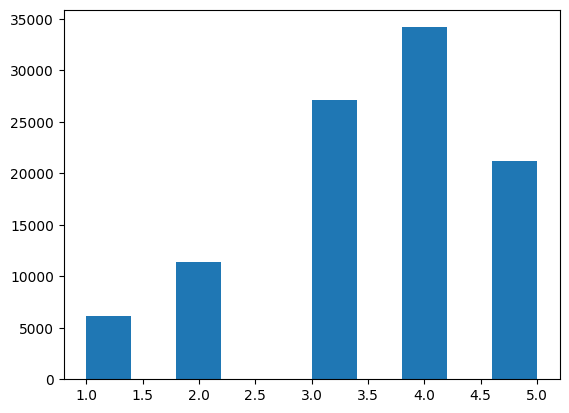

In [ ]:
plt.hist(df.rating)
plt.show()

In [ ]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
df.groupby("rating")["user_id"].count()

,user_id
rating,
1,6110
2,11370
3,27145
4,34174
5,21201


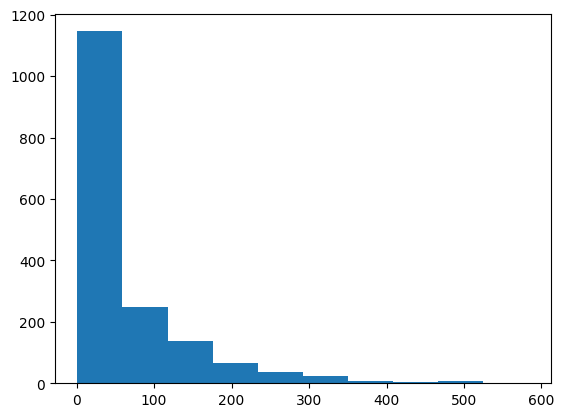

In [ ]:
plt.hist(df.groupby("item_id")["item_id"].count())
plt.show()

In [ ]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print(f"Number of users: {n_users}")
print(f"Number of items: {n_items}")

Number of users: 943
Number of items: 1682


In [ ]:
import numpy as np

In [ ]:
ratings = np.zeros((n_users, n_items))

In [ ]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

In [ ]:
type(ratings)

numpy.ndarray

In [ ]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
sparsity =float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print(f"Sparsity: {sparsity}")

Sparsity: 6.304669364224531


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.3, random_state=42)

In [ ]:
ratings_train.shape

(660, 1682)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
url = "https://raw.githubusercontent.com/Afgcc132/python-ml-course/refs/heads/master/datasets/ml-100k/u.data.csv"
df = pd.read_csv(url, sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)


In [ ]:
# Calculate user similarity matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [ ]:
def predict_ratings(user_id, user_item_matrix, user_similarity_df):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_ratings = user_item_matrix.iloc[user_index].values
    similarity_scores = user_similarity_df.iloc[user_index].values
    weighted_sum = similarity_scores.dot(user_item_matrix.values) / (similarity_scores.sum() + 1e-9)
    return weighted_sum

# Example prediction for a user
user_id = 22

predicted_ratings = predict_ratings(user_id, user_item_matrix, user_similarity_df)
print(f"Predicted ratings for User {user_id}: {predicted_ratings}")


Predicted ratings for User 22: [2.45484083e+00 8.84215692e-01 4.31543636e-01 ... 2.37014902e-04
 7.61167231e-03 5.99499867e-03]


In [ ]:
def evaluate_model(predicted, actual):
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    return rmse

# Example evaluation (assuming you have actual values)
# Replace with actual values as needed
predicted = [4.5, 3.0, 4.2]  # Example predicted values
actual = [4, 3, 5]           # Example actual values
rmse = evaluate_model(predicted, actual)
print(f"RMSE: {rmse}")


RMSE: 0.544671154612273


In [ ]:
# Mostrar los ítems calificados por el usuario
user_rated_items = user_item_matrix.loc[user_id]

# Filtrar ítems calificados (excluir valores iguales a 0)
rated_items = user_rated_items[user_rated_items > 0]
print(f"Ítems calificados por el Usuario {user_id}:")
rated_items


Ítems calificados por el Usuario 22:


,22
item_id,
2,2.0
4,5.0
17,4.0
21,4.0
24,5.0
...,...
999,4.0
1000,3.0
1001,1.0


In [ ]:
filtered_rows = df[(df.user_id == 22) & (df.item_id == 377)]
print(filtered_rows)


   user_id  item_id  rating  timestamp
2       22      377       1  878887116


In [ ]:
# Calcular las predicciones para el usuario 22
user_id = 22
predicted_ratings = predict_ratings(user_id, user_item_matrix, user_similarity_df)

# Acceder al índice del ítem XXX en la matriz de usuario-ítem
item_index = user_item_matrix.columns.get_loc(50)  # Asegúrate de que el ID de ítem esté en las columnas

# Obtener la calificación predicha para el ítem 377
predicted_rating_for_item = predicted_ratings[item_index]
print(f"La calificación predicha por el modelo para el usuario {user_id} en el ítem {377} es: {predicted_rating_for_item}")


La calificación predicha por el modelo para el usuario 22 en el ítem 377 es: 3.7369564682094225


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Datos de ejemplo: matriz usuario-ítem

# Crear matriz ítem-usuario (con ítems como filas)
item_user_matrix = df.pivot_table(index='item_id', columns='user_id', values='rating').fillna(0)

# Calcular la similitud coseno entre los ítems
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

print("Matriz de Similitud de Ítems:")
print(item_similarity_df)

# Recomendación de ítems similares
def recommend_similar_items(item_id, item_similarity_df, n_recommendations=2):
    # Obtener los ítems similares ordenados por similitud
    similar_items = item_similarity_df[item_id].sort_values(ascending=False)
    # Excluir el ítem actual
    similar_items = similar_items.drop(item_id)
    return similar_items.head(n_recommendations)

# Obtener ítems similares al ítem 101
item_id = 120
recommendations = recommend_similar_items(item_id, item_similarity_df)
print(f"\nÍtems similares al ítem {item_id}:")
print(recommendations)


Matriz de Similitud de Ítems:
item_id      1         2         3         4         5         6         7     \
item_id                                                                         
1        1.000000  0.402382  0.330245  0.454938  0.286714  0.116344  0.620979   
2        0.402382  1.000000  0.273069  0.502571  0.318836  0.083563  0.383403   
3        0.330245  0.273069  1.000000  0.324866  0.212957  0.106722  0.372921   
4        0.454938  0.502571  0.324866  1.000000  0.334239  0.090308  0.489283   
5        0.286714  0.318836  0.212957  0.334239  1.000000  0.037299  0.334769   
...           ...       ...       ...       ...       ...       ...       ...   
1678     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1679     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1680     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1681     0.047183  0.078299  0.000000  0.056413  0.000000  0.000000  0.051498  

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Datos de ejemplo (usuarios y calificaciones de ítems)


# Crear matriz ítem-usuario (con ítems como filas)
item_user_matrix = df.pivot_table(index='item_id', columns='user_id', values='rating').fillna(0)

# Calcular la similitud coseno entre los ítems
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

# Función para hacer recomendaciones para un usuario específico
def recommend_items_for_user(user_id, user_item_matrix, item_similarity_df, n_recommendations=3):
    # Obtener las calificaciones del usuario
    user_ratings = user_item_matrix.loc[:, user_id]
    # Filtrar ítems que el usuario ya ha calificado
    rated_items = user_ratings[user_ratings > 0].index

    # Calcular predicciones para ítems no calificados
    scores = {}
    for item in rated_items:
        # Obtener ítems similares
        similar_items = item_similarity_df[item].sort_values(ascending=False)
        for similar_item, similarity_score in similar_items.items():
            # Ignorar ítems ya calificados por el usuario
            if similar_item not in rated_items:
                if similar_item not in scores:
                    scores[similar_item] = 0
                # Sumar ponderación de similitud * calificación del ítem
                scores[similar_item] += similarity_score * user_ratings[item]

    # Ordenar ítems por la puntuación predicha
    recommended_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return recommended_items[:n_recommendations]

# Obtener recomendaciones para el usuario con ID 1
user_id = 22
user_item_matrix = item_user_matrix.T  # Transponer para tener usuarios como filas
recommendations = recommend_items_for_user(user_id, user_item_matrix, item_similarity_df)
print(f"Recomendaciones para el usuario {user_id}:")
print(recommendations)


Recomendaciones para el usuario 22:
[(174, 356.4911928476873), (204, 356.2807572130635), (50, 349.11813318589105)]
